+ 서포트벡터머신(support vector machines, SVM) : 고차원의 공간에서 초평면을 찾아 이를 이용해 분류, 회귀 수행
  + 기본생각 : 최대 마진을 가지는 초평면을 선택하는 것 $\rightarrow$ 최적의 정준초평면을 찾는 것
  + 선형분류 : 최대 마진을 가지는 선형 판별에 기초함 $\rightarrow$ 새로운 자료에 대한 오분류가 낮아짐, 일반성이 더 좋음
    + 마진 : 초평면에서 가장 가까운 훈련용 자료까지의 거리
    + $h(x) = w^Tx + b = w_1x_1 + w_2x_2 + ... + w_dx_d + b$ : 모든 자료에 대해 군집을 예측해주는 선형판별의 역할 수행
      + $h(x) < 0 \rightarrow -1$의 군집
      + $h(x) > 0 \rightarrow +1$의 군집
      + $h(x) = 0 \rightarrow $ 서포트벡터 : 분리초평면의 마진상에 정확히 위치하는 점
        + 각 자료점 $x_i$와 초평면 간의 거리 : $\delta_i = \frac {y_i h(x_i)} {||w||}$
          + 거리(마진)를 최대로 하기 위해서는 $||w||$를 최소로 하는 것이 최선의 선택 $\rightarrow$ 라그랑지 승수법으로 해결
            + 여유변수 $\xi_ㅑ$를 도입 : 차원은 그대로 유지하되 오분류가 일어나는 점들이 실제 위치하는 마진까지의 거리 계산
            + $0 \le \xi_i \le 1$이면 그 점은 여전히 정확히 분류
            + $\xi_i > 1$이면 그 점은 오분류
    $\rightarrow$ 분류의 목적 : 최대 마진을 가지며 동시에 여유변수의 합을 최소로 하는 초평면을 찾는 것
    
  + 비선형분류 : $(x_1, x_2) \rightarrow (y_1, y_2, y_3)$ - 더 높은 차원으로 mapping하여 분리할 수 있는 초평면을 찾아야함
    + 변환된 차원 공간에서의 선형 결정면은 $f(x) = w * \phi(x) + b$
      + $w = \sum_{i = 1}^{n} \alpha_i \phi(x_i)$ for some variable $\alpha$ $\rightarrow$ Representer 정리
        + 위의 정리를 통해 $w$를 최적화 하는 대신 $\alpha$를 최적화할 수 있기에 w와 b를 구하기 위해 맵핑된 결과 $\phi$는 별도로 계산할 필요가 없음
      + 커널함수 : $K(x_i, x) = \phi(X_i) * \phi(x) = (p * q)^2$
        + 위의 결과로부터 맵핑된 점들 간의 내적은 원자료의 내적을 계산한 뒤 제곱을 취해 구할 수 있어 $\phi$ 함수의 적용 없이 내적을 구할 수 있다.
        + 종류 : 선형 / 다항 / 가우시안 / 가우시안 RBF / 라플라스 RBF / 역탄젠트 / 시그모이드 / 제1종 베셀함수 / ANOVA Radial basis / 일차원 선형스플라인
  + 속성들 간의 의존성은 고려하지 않음

## 예제 1. svm(){e1071}

In [1]:
set.seed(100)
install.packages("e1071")
library(e1071)
data(iris)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [2]:
svm.e1071 = svm(Species ~ ., data = iris, type = "C-classification", kernel = "radial", cost = 10, gamma = 0.1)
summary(svm.e1071)


Call:
svm(formula = Species ~ ., data = iris, type = "C-classification", 
    kernel = "radial", cost = 10, gamma = 0.1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 

Number of Support Vectors:  32

 ( 3 16 13 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




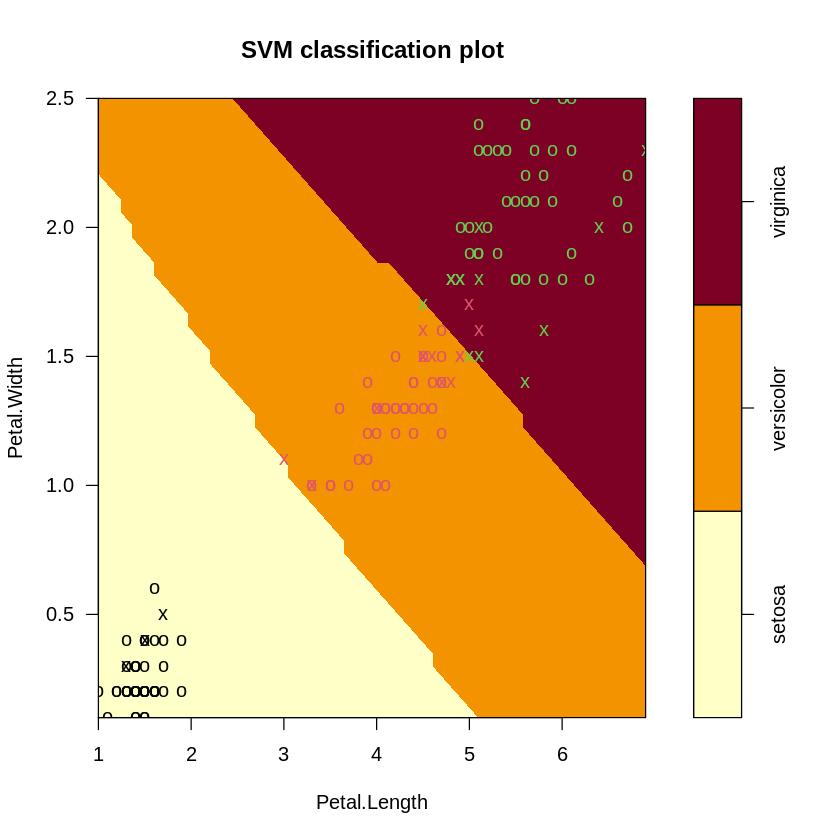

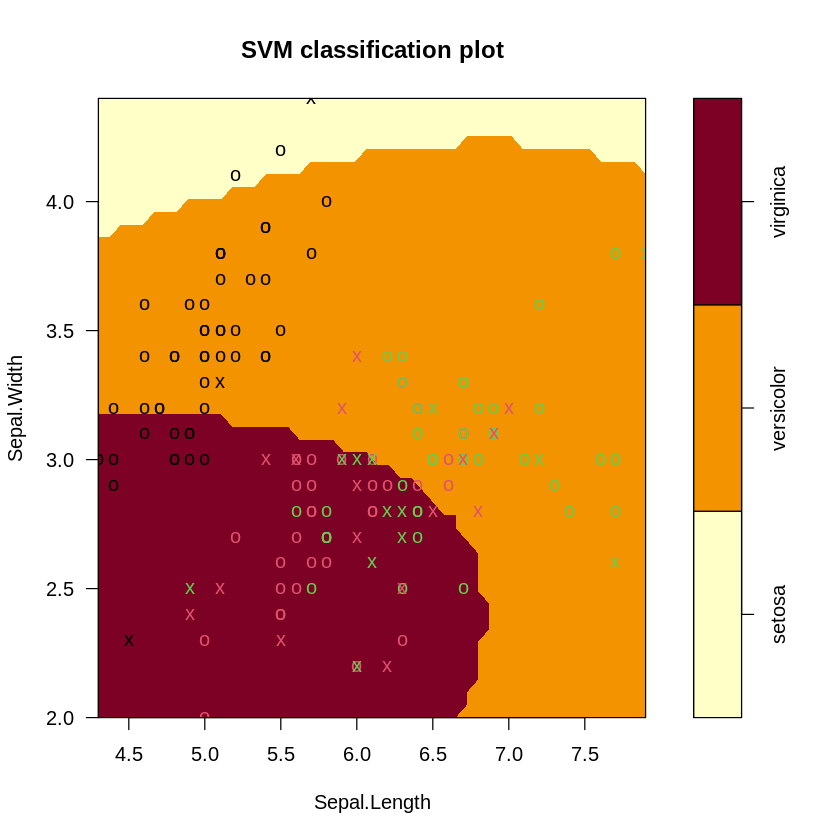

In [3]:
# slice = 변수가 2개 이상일 때 상수값을 할당
# 나머지 변수의 지저된 값에서의 2차원 그림, x : 서포트벡터, o : 자료점
plot(svm.e1071, iris, Petal.Width ~ Petal.Length,
     slice = list(Sepal.Width = 3, Sepal.Length = 4))
plot(svm.e1071, iris, Sepal.Width ~ Sepal.Length,
     slice = list(Petal.Width = 2.5, Petal.Length = 3))

In [5]:
pred = predict(svm.e1071, iris, decision.values = TRUE)
acc = table(pred, iris$Species)
acc

            
pred         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         47         0
  virginica       0          3        50

In [6]:
classAgreement(acc)  # 모형의 정확도

$diag
[1] 0.98

$kappa
[1] 0.97

$rand
[1] 0.9739597

$crand
[1] 0.941045


+ svm() 옵션
  + type = svm 수행 방법(분류 / 회귀)
  + kernel = 커널의 종류
  + degree = 다항 커널 시 경우의 모수
  + gamma = 선형 이 외의 모든 커널의 모수
  + coef0 = 다항, 시그모이드의 모수
  + cost = 비용함수, 디폴트 1
  + cross = k-중첩 교차타당도의 k값
  
+ 모형 acc : 굉장히 높은 수준의 정확도

In [7]:
# tune() : 통계적 방법의 초모수 조율, 최적 모수 제공
# 6 x 2 = 12개의 조합에서 모수 조율이 이루어짐
tuned = tune.svm(Species ~., data = iris, gamma = 10^(-6:-1), cost = 10^(1:2))
summary(tuned)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
  0.01  100

- best performance: 0.03333333 

- Detailed performance results:
   gamma cost      error dispersion
1  1e-06   10 0.58666667 0.28940126
2  1e-05   10 0.58666667 0.28940126
3  1e-04   10 0.49333333 0.26143007
4  1e-03   10 0.09333333 0.06440612
5  1e-02   10 0.04000000 0.05621827
6  1e-01   10 0.04000000 0.04661373
7  1e-06  100 0.58666667 0.28940126
8  1e-05  100 0.49333333 0.26143007
9  1e-04  100 0.10000000 0.05665577
10 1e-03  100 0.04000000 0.05621827
11 1e-02  100 0.03333333 0.04714045
12 1e-01  100 0.04666667 0.04499657


+ 최적의 모수 : gamma 0.01, cost 100

## 예제 2. ksvm(){kernlab}

In [8]:
install.packages("kernlab")
library(kernlab)
data(iris)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
svm.kernlab = ksvm(Species ~ ., data = iris, type = "C-bsvc", kernel = "rbfdot",
                   kpar = list(sigma = 0.1), C = 10, prob.model = TRUE)
svm.kernlab

Support Vector Machine object of class "ksvm" 

SV type: C-bsvc  (classification) 
 parameter : cost C = 10 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.1 

Number of Support Vectors : 32 

Objective Function Value : -5.8442 -3.0652 -136.9786 
Training error : 0.02 
Probability model included. 

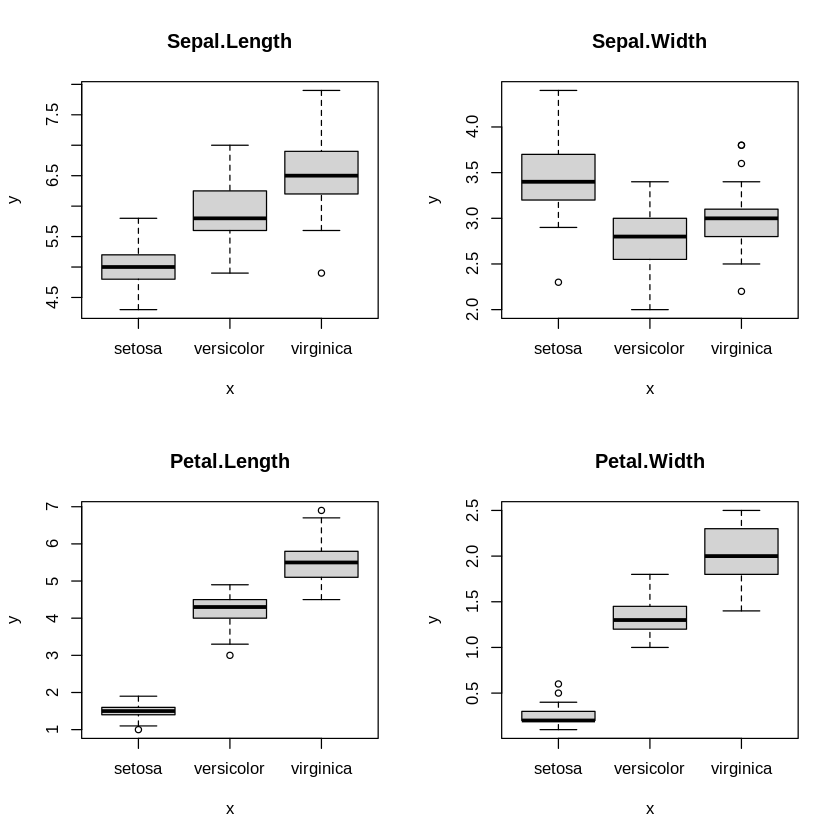

In [10]:
fit = fitted(svm.kernlab)
par(mfrow = c(2, 2))
plot(fit, iris[,1], main = "Sepal.Length")
plot(fit, iris[,2], main="Sepal.Width")
plot(fit, iris[,3], main="Petal.Length")
plot(fit, iris[,4], main="Petal.Width")

In [11]:
#type = probabilities, decision, response, votes
head(predict(svm.kernlab, iris, type = "probabilities"))
head(predict(svm.kernlab, iris, type = "decision"))
head(predict(svm.kernlab, iris, type = "response"))
head(predict(svm.kernlab, iris, type = "votes"))

setosa,versicolor,virginica
0.9826066,0.010728051,0.006665380
0.9768596,0.015590995,0.007549405
0.9845775,0.008884025,0.006538432
0.9807955,0.011639316,0.007565208
0.9838161,0.009651151,0.006532739
0.9694467,0.021350318,0.009202970


-1.398258,-1.185073,-4.223584
-1.275065,-1.148625,-4.225240
-1.460398,-1.191025,-3.886884
-1.371812,-1.149203,-3.782832
-1.433083,-1.191048,-3.933006
-1.171098,-1.091091,-3.839142


[1] setosa setosa setosa setosa setosa setosa
Levels: setosa versicolor virginica

2,2,2,2,2,2,2,2,2,2,⋯,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
0,0,0,0,0,0,0,0,0,0,⋯,2,2,2,2,2,2,2,2,2,2


In [12]:
table(predict(svm.kernlab, iris), iris[,5])  # 정오분류표

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         47         0
  virginica       0          3        50

## 예제 3. svm(){e1071} 서포트벡터회귀(SVR)

In [13]:
# 분석용 자료 생성
x = c(1:20)
y = c(3, 4, 8, 4, 6, 9, 8, 12, 15, 26, 35, 40, 45, 54, 49, 59, 60, 62, 63, 68)
data = data.frame(x, y)
head(data)

,x,y
,<int>,<dbl>
1,1,3
2,2,4
3,3,8
4,4,4
5,5,6
6,6,9


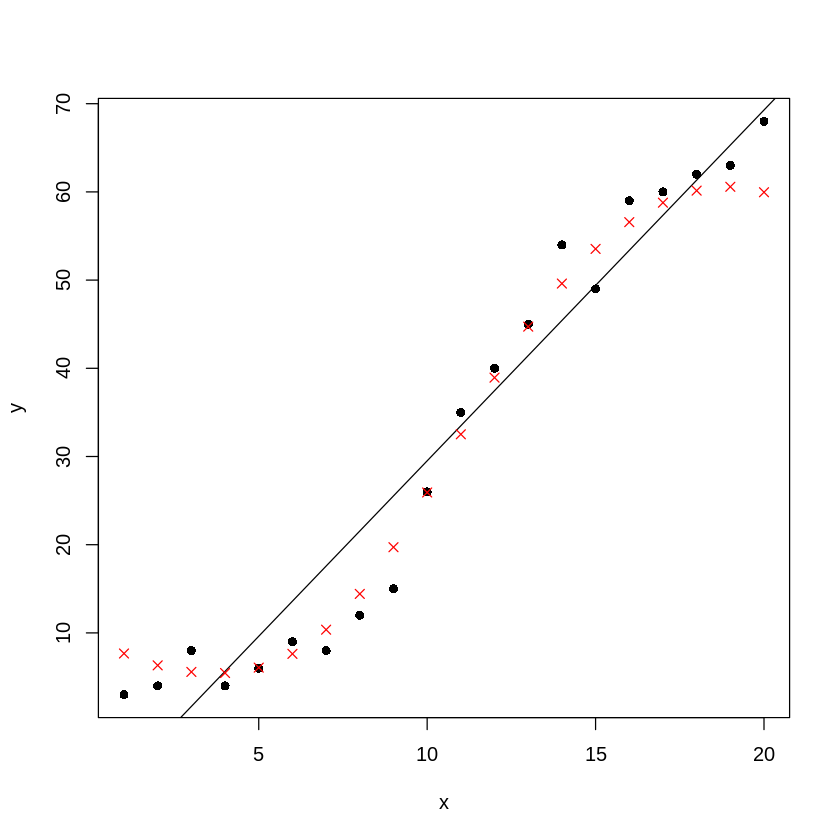

In [18]:
# 단순회귀 : lm()
plot(data, pch = 16)
model_lm = lm(y ~ x , data)
abline(model_lm)

# SVR : svm()
model_svr = svm(y ~ x, data)
pred.y = predict(model_svr, data)
#직선 : 단순회귀, x : SVR, . : 자료점
points(data$x, pred.y, col = "red", pch = 4)

In [19]:
# 단순회귀 RMSE
lm.error = model_lm$residuals
lmRMSE = sqrt(mean(lm.error^2))
lmRMSE

[1] 5.703778

In [20]:
# SVR RMSE
error = data$y - pred.y
svmRMSE = sqrt(mean(error^2))
svmRMSE

[1] 3.157061

+ 단순회귀 svmRMSE > SVR svmRMSE : 감소
+ lm vs SVR

  1) RMSE 감소

  2) 더 유연한 모형(plot)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 epsilon cost
       0  128

- best performance: 8.735007 



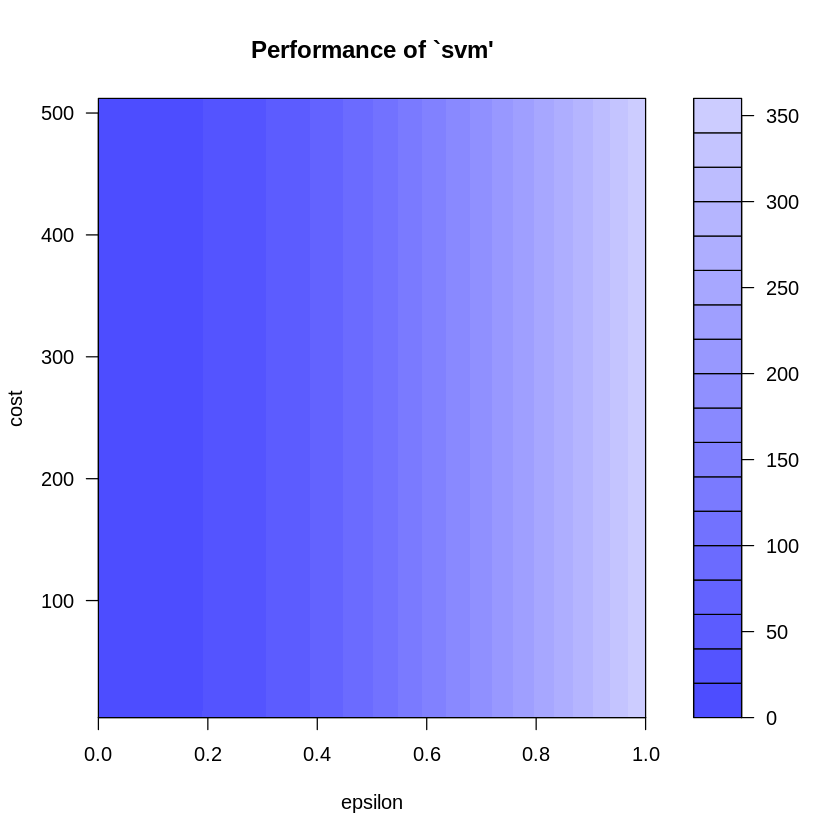

In [21]:
#tune() : 각 모형에 대한 MSE 값 제공
tuneResult = tune(svm, y ~ x, data = data,
                  ranges = list(epsilon = seq(0, 1, 0.1), cost = 2^(2:9)))  # 88개 모수 조합
print(tuneResult)
plot(tuneResult)  # 시각화

+ 최적의 모수 : epsilon 0, cost 128
+ 이 plot에서 색이 짙을수록 RMSE가 0에 가까워 더 나은 모형임을 의미함


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 epsilon cost
    0.08    8

- best performance: 12.56983 



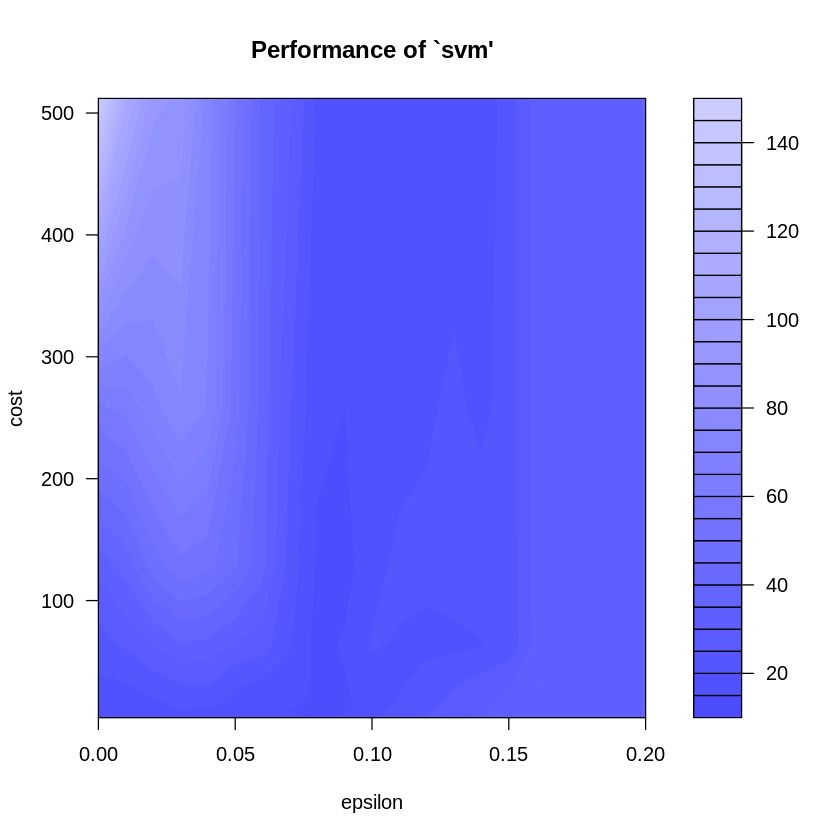

In [22]:
tuneResult = tune(svm, y ~ x, data = data,
                  ranges = list(epsilon = seq(0, 0.2, 0.01), cost = 2^(2:9)))  # 168개 모수 조합
print(tuneResult)
plot(tuneResult)  # 시각화

+ 보다 더 정교한 모수조율을 위해 더 좁은 영역에서 격자 탐색을 실시한 결과임
+ 최적의 모수 : epsilon 0.08, cost 8

In [23]:
# R에서 최적의 모형을 제공받을 수 있는 코드
tunedModel = tuneResult$best.model
tpred.y = predict(tunedModel, data)
error = data$y - tpred.y
tsvmRSME = sqrt(mean(error^2))
tsvmRSME

[1] 2.047823

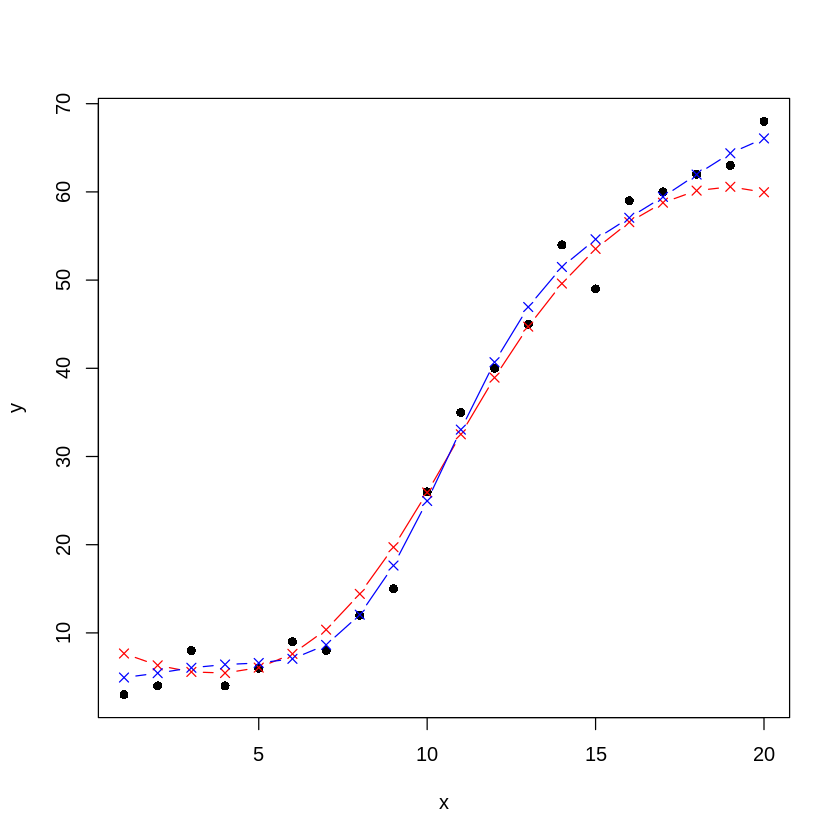

In [24]:
plot(data, pch = 16)
points(data$x, pred.y, col = "red", pch = 4, type = "b")  # 모수조절 전
points(data$x, tpred.y, col = "blue", pch = 4, type = "b")  # 모수조절 후